## 용어
- 쌍별 비교(pairwise comparison): 여러 그룹 간의 가설검정
- 총괄검정(comnibus test): 여러 그룹 평균들의 전체 분산에 관한 단일 가설검정 => ANOVA
- 분산분해(decomposition of variance): 구성 요소 분리. 예를 들면 전체 평균, 처리 평균, 잔차 오차로부터 개별 값들에 대한 기여를 뜻함
- F통계량(F-statistic): 그룹 평균 간의 차이가 랜덤 모델에서 예상되는 것에서 벗어나는 정도를 측정하는 표준화된 통계량
- ss(sum of squares): 어떤 평균으로부터의 편차들의 제곱합

## 분산분석(ANOVA)
- 여러 그룹 간의 통계적으로 유의미한 차이를 검정하는 통계적 절차

<절차><br>
1. 모든 데이터를 한 상자에 모은다
2. 각 집단의 표본의 개수를 갖는 집단수만큼의 재표본을 섞어서 추출
3. 각 그룹의 평균을 기록
4. 각 그룹 평균 사이의 분산을 기록
5. 2~4단계를 여러 번 반복
<br>
- p값: 재표본추출한 분산이 관찰된 변화를 초과한 시간은 어느 정도인가?

In [10]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
four_sessions = pd.read_csv('../../data/four_sessions.csv')

In [3]:
four_sessions

,Page,Time
0,Page 1,164
1,Page 2,178
2,Page 3,175
3,Page 4,155
4,Page 1,172
5,Page 2,191
6,Page 3,193
7,Page 4,166
8,Page 1,177
9,Page 2,182


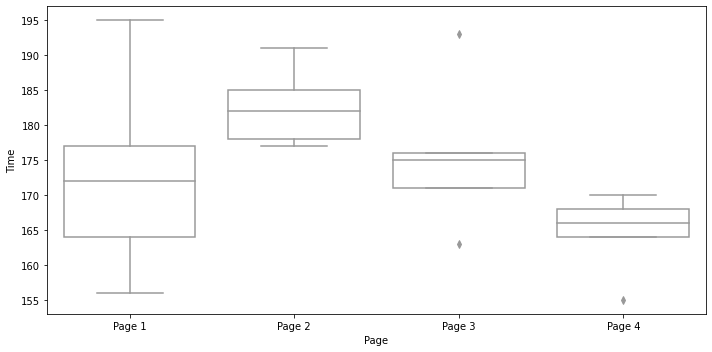

In [4]:
# 네 그룹간의 차이 시각적으로 확인하기(box plot)
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(data=four_sessions, x='Page', y='Time', ax=ax, color='white')

plt.tight_layout()
plt.show()

pvalue: 0.08066666666666666


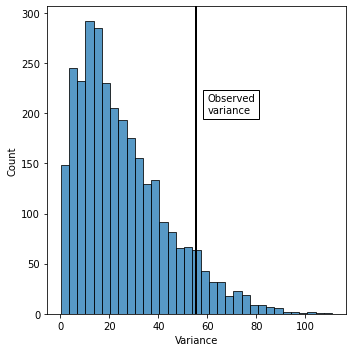

In [5]:
# 순열검정
observed_variance = four_sessions.groupby('Page').mean().var()[0] # 실제 관측된 집단 평균간의 분산

def perm_test(df):
    df = df.copy()
    df['Time'] = np.random.permutation(four_sessions['Time'].values)
    return df.groupby('Page').mean().var()[0]

perm_variance = [perm_test(four_sessions) for _ in range(3000)]
p_value = np.mean([var > observed_variance for var in perm_variance])
print(f"pvalue: {p_value}")

fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(data=perm_variance, ax=ax)
ax.axvline(x=observed_variance, color='black', linewidth=2)
ax.text(60, 200, s='Observed\nvariance', bbox={'facecolor':'white'})
ax.set_xlabel('Variance')

plt.tight_layout()
plt.show()

## F 통계량(F-statistic)
- F 통계량을 기반으로 ANOVA 통계 검정을 할 수 있다.

In [11]:
model = smf.ols('Time ~ Page', data=four_sessions).fit()
                
aov_table = sm.stats.anova_lm(model)
print(aov_table)

            df  sum_sq     mean_sq         F    PR(>F)
Page       3.0   831.4  277.133333  2.739825  0.077586
Residual  16.0  1618.4  101.150000       NaN       NaN


In [6]:
res = stats.f_oneway(four_sessions[four_sessions.Page == 'Page 1'].Time,
                     four_sessions[four_sessions.Page == 'Page 2'].Time,
                     four_sessions[four_sessions.Page == 'Page 3'].Time,
                     four_sessions[four_sessions.Page == 'Page 4'].Time)
print(f'F-Statistic: {res.statistic:.4f}')
print(f'p-value: {res.pvalue:.4f}')

F-Statistic: 2.7398
p-value: 0.0776
